# Design of Experiment (DOE) and Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import os

csv_path = os.path.join('..', 'dataset', 'dataset_ur3_cobotops.csv')
df = pd.read_csv(csv_path)

## 1. Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [3]:
df.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7355.000000
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,41.891094,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.037797
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,3.680003,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.190719
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,32.000000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,39.500000,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,44.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,44.500000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,44.937500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000


In [4]:
target_columns = ['grip_lost', 'Robot_ProtectiveStop']

numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.drop(['Timestamp'])

numerical_features = df[numerical_columns].columns.difference(target_columns)
categorical_features = df[categorical_columns].columns.difference(target_columns)

print("Columns: ", df.columns)
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Dalam kasus ini, kolom target adalah 'Robot_ProtectiveStop' dan 'grip_lost'. Kedua target berperilaku sebagai boolean (binary classification).
# Namun, kolom 'Robot_ProtectiveStop' dinyatakan dalam bentuk numerik (0 dan 1).
# Dataset secara mentah tidak memiliki fitur kategorikal.
# Fitur 'Timestamp' masih dalam bentuk string dan perlu diubah menjadi tipe datetime pada tahap preprocessing.

Columns:  Index(['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')
Numerical Columns: Index(['Num', 'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Tool_current', 'cycle ', 'Robot_ProtectiveStop'],
      dtype='object')
Categorical Columns: Index(['grip_lost'], dtype='object')


In [5]:
if not categorical_columns.empty:
    df[categorical_columns].nunique()

In [6]:
if not categorical_columns.empty:
    df[categorical_columns].value_counts()

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage
})

missing_df

,Column,Missing Count,Missing Percentage
Num,Num,0,0.000000
Timestamp,Timestamp,0,0.000000
Current_J0,Current_J0,46,0.620867
Temperature_T0,Temperature_T0,54,0.728843
Current_J1,Current_J1,54,0.728843
Temperature_J1,Temperature_J1,54,0.728843
Current_J2,Current_J2,54,0.728843
Temperature_J2,Temperature_J2,54,0.728843
Current_J3,Current_J3,54,0.728843
Temperature_J3,Temperature_J3,54,0.728843


In [8]:
df[df['Robot_ProtectiveStop'].isna()]

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
813,814,2022-10-26T08:31:00.829Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,False
947,948,2022-10-26T08:33:15.550Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,False
976,977,2022-10-26T08:33:44.702Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,False
1046,1047,2022-10-26T08:34:55.110Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,False
1315,1316,2022-10-26T08:40:05.795Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,False
2089,2090,"""2022-10-26T08:53:11.129Z""",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,False
2237,2238,"""2022-10-26T08:55:40.880Z""",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,NaN,False
2316,2317,2022-10-26T08:57:00.305Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN,False
2392,2393,2022-10-26T08:58:16.761Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,NaN,False
2668,2669,2022-10-26T09:02:56.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,False


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 7
print('Visualization libraries imported successfully!')

Visualization libraries imported successfully!


In [10]:
# df.hist(bins=20, figsize=(15, 15), edgecolor='black', alpha=0.7)
# plt.suptitle('Histograms of Numerical Features')
# plt.show()

In [11]:
# # Box plots
# n_cols = 6
# n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
# if n_rows == 1:
#     axes = axes.reshape(1, -1)
# axes = axes.flatten()

# for i, col in enumerate(numerical_columns):
#     axes[i].boxplot(df[col].dropna())
#     axes[i].set_title(col)
#     axes[i].set_ylabel(col)
#     axes[i].grid(True, alpha=0.3)

# # Remove empty subplots
# for i in range(len(numerical_columns), len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()

In [12]:
# def detect_outliers_iqr(df, column):
#     """Detect outliers using IQR method"""
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     return outliers, lower_bound, upper_bound

# def detect_outliers_zscore(df, column, threshold=3):
#     """Detect outliers using Z-score method"""
#     col_data = df[column]
#     non_null = col_data.dropna()
#     z_scores = np.abs(stats.zscore(non_null))
#     outlier_mask = (z_scores > threshold)
#     outliers = df.loc[non_null.index[outlier_mask]]
#     return outliers

# print("OUTLIER DETECTION RESULTS")
# print("=" * 50)

# outlier_summary = []

# for col in numerical_columns:
#     # IQR method
#     outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
#     iqr_count = len(outliers_iqr)
#     iqr_percentage = iqr_count / len(df) * 100
    
#     # Z-score method
#     outliers_zscore = detect_outliers_zscore(df, col)
#     zscore_count = len(outliers_zscore)
#     zscore_percentage = zscore_count / len(df) * 100
    
#     outlier_summary.append({
#         'Feature': col,
#         'IQR_Outliers_Count': iqr_count,
#         'IQR_Outliers_Percentage': iqr_percentage,
#         'ZScore_Outliers_Count': zscore_count,
#         'ZScore_Outliers_Percentage': zscore_percentage
#     })

# outlier_df = pd.DataFrame(outlier_summary)
# outlier_df

In [13]:
# corr_matrix = df.corr(numeric_only=True)

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# plt.title('Correlation Heatmap')
# plt.show()

In [14]:
# # Scatter plot against target columns

# df_float_target = df.copy()
# df_float_target[target_columns] = df[target_columns].astype(float)

# n_features = len(numerical_features)
# n_targets = len(target_columns)
# n_cols = 6
# n_rows = (n_features + n_cols - 1) // n_cols

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3*n_rows))
# if n_rows == 1:
#     axes = axes.reshape(1, -1)
# axes = axes.flatten()

# for i, feature in enumerate(numerical_features):
#     for j, target in enumerate(target_columns):
#         if j == 0:
#             color = 'blue'
#             size = 10
#         else:
#             color = 'red'
#             size = 5
#         alpha = 0.3

#         axes[i].scatter(df_float_target[feature], df_float_target[target],
#                        c=color, alpha=alpha, s=size, label=target)

#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Target Values')
#     axes[i].set_title(f'{feature} vs Targets')
#     axes[i].legend()
#     axes[i].grid(True, alpha=0.3)

# for i in range(n_features, len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()


In [15]:
# from pandas.plotting import scatter_matrix

# # Create a copy of the dataframe with float targets for plotting
# df_float_target = df.copy()
# df_float_target[target_columns] = df[target_columns].astype(float)
# df_float_target = df_float_target.dropna()

# # --- Plot 1: Scatter Matrix colored by 'grip_lost' ---
# axes1 = scatter_matrix(df_float_target[numerical_features],
#                        c=df_float_target['grip_lost'].map({0: 'cyan', 1: 'red'}),
#                        alpha=0.6,
#                        figsize=(15, 15),
#                        diagonal='hist')

# # Add a title to the entire figure
# plt.suptitle('Scatter Matrix - Colored by grip_lost (0=cyan, 1=red)', fontsize=16, y=0.95)
# plt.show()

# # --- Plot 2: Scatter Matrix colored by 'Robot_ProtectiveStop' ---
# axes2 = scatter_matrix(df_float_target[numerical_features],
#                        c=df_float_target['Robot_ProtectiveStop'].map({0: 'cyan', 1: 'red'}),
#                        alpha=0.6,
#                        figsize=(15, 15),
#                        diagonal='hist')


# # Add a title to this figure
# plt.suptitle('Scatter Matrix - Colored by Robot_ProtectiveStop (0=cyan, 1=red)', fontsize=16, y=0.95)
# plt.show()

## 2. Data Preprocessing

In [16]:
df_processed = df.copy()
if df_processed['Timestamp'].dtype == 'object':
    df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'].str.strip('"'), errors='raise')
    
df_processed

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26 15:36:02.555000+00:00,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26 15:36:03.562000+00:00,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26 15:36:04.571000+00:00,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26 15:36:05.572000+00:00,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [17]:
df_processed = df_processed.dropna()
df_processed

# Row yang memiliki missing values hanya sedikit dan hanya terjadi pada kolom 'Robot_ProtectiveStop' yang memiliki missing value.
# Sehingga, bisa di-drop.

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26 15:36:02.555000+00:00,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26 15:36:03.562000+00:00,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26 15:36:04.571000+00:00,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26 15:36:05.572000+00:00,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [18]:
df_processed = df_processed.astype({
    'grip_lost': int,
    'Robot_ProtectiveStop': int
})
df_processed

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0,0
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0,0
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0,0
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0,0
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26 15:36:02.555000+00:00,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0,0
7405,7406,2022-10-26 15:36:03.562000+00:00,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0,0
7406,7407,2022-10-26 15:36:04.571000+00:00,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0,0
7407,7408,2022-10-26 15:36:05.572000+00:00,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0,0


In [19]:
# df_processed.plot(x='Timestamp', subplots=True, figsize=(15, 24), grid=True, title='Time Series Data')
# plt.show()

In [20]:
# df_processed = df_processed.sample(n=1000, random_state=42)
# df_processed

## 3. Modelling and Evaluation

Dataset yang digunakan yakni `dataset_ur3_cobotops.csv` memiliki target prediksi yakni `grip_lost` dan `Robot_ProtectiveStop` yang bersifat biner (0 dan 1) dan unbalanced. Kedua target tersebut menyatakan apakah terjadi kehilangan grip pada robot atau tidak serta apakah robot mengalami penghentian protektif atau tidak, menginferensikan bahwa terjadi sebuah kesalahan dalam pengoperasian robot. Oleh karena itu, evaluasi model difokuskan untuk menggunakan metrik recall untuk meminimalkan false negative, yaitu situasi di mana model gagal mendeteksi kejadian kesalahan padahal sebenarnya terjadi. Namun, false positive juga perlu diperhatikan untuk menghindari alarm palsu yang berlebihan sehingga metrik f1-score juga digunakan sebagai metrik tambahan. Metrik lain seperti accuracy, precision, dan AUC-ROC juga dihitung untuk memberikan gambaran yang lebih komprehensif tentang kinerja model.

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import time

In [22]:
X, y = df_processed[numerical_features], df_processed[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def hold_out_validation(model, X, y, plot_roc=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for y_col in y.columns:
        print('=' * 60)
        print(f"Hold-Out Validation for {y_col}:")
        print('=' * 60)
        start_time = time.time()
        model.fit(X_train.values, y_train[y_col].values)
        training_time = time.time() - start_time
        print(f"Training time: {training_time} seconds")
        start_predict_time = time.time()
        y_pred = model.predict(X_test.values)
        predict_time = time.time() - start_predict_time
        print(f"Prediction time: {predict_time} seconds")
        print(classification_report(y_test[y_col], y_pred, zero_division=0))

        cm = confusion_matrix(y_test[y_col], y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {y_col}')
        plt.show()

        # Add ROC AUC plot
        if plot_roc:
            try:
                # Get probabilities
                if hasattr(model, 'predict_proba'):
                    y_probs = model.predict_proba(X_test.values)[:, 1]
                elif hasattr(model, 'decision_function'):
                    y_probs = model.decision_function(X_test.values)
                else:
                    print("Model doesn't support probability prediction - skipping ROC plot")
                    continue
                
                # Calculate ROC
                fpr, tpr, _ = roc_curve(y_test[y_col], y_probs)
                auc_score = roc_auc_score(y_test[y_col], y_probs)
                
                # Plot ROC curve
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', linewidth=2)
                plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve - {y_col}')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.show()
                
                print(f"AUC-ROC: {auc_score:.4f}")
                
            except Exception as e:
                print(f"Could not plot ROC curve: {e}")
        print()

def k_fold_cross_validation(model, X, y, k=5, roc_auc=False):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    for y_col in y.columns:
        print('=' * 60)
        print(f"Cross Validation for {y_col}:")
        print('=' * 60)

        scorers = {
            'precision': make_scorer(precision_score, zero_division=0),
            'recall': make_scorer(recall_score, zero_division=0),
            'f1': make_scorer(f1_score, zero_division=0)
        }
        if roc_auc:
            scorers['roc_auc'] = make_scorer(roc_auc_score, needs_proba=True)
            
        # cv_results = cross_validate(model, X.values, y[y_col].values, cv=kf, scoring=['precision', 'recall', 'f1', 'roc_auc'])
        cv_results = cross_validate(model, X.values, y[y_col].values, cv=kf, scoring=scorers)

        print(f"Model Performance ({k}-Fold Cross Validation):")

        for key, value in cv_results.items():
            print(f"\n{key}: {value}")
            if key.startswith('test_'):
                print(f"Average {key}: {np.mean(value):.2f}")
        print()

### 3.1 KNN

In [24]:
from supervised_learning.knn import KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [25]:
# custom_model = KNNClassifier(k=5, distance_method='euclidean')

# pipeline = ImbPipeline([
#     # ('smote', SMOTE(random_state=42)),
#     ('knn', custom_model)
# ])

# hold_out_validation(pipeline, X, y, plot_roc=True)

In [26]:
# sklearn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# pipeline = ImbPipeline([
#     # ('smote', SMOTE(random_state=42)),
#     # ('scaler', StandardScaler()),
#     ('knn', sklearn_model)
# ])

# hold_out_validation(pipeline, X, y, plot_roc=True)

In [27]:
# custom_model = KNNClassifier(k=5, distance_method='euclidean')

# pipeline = Pipeline([
#     # ('smote', SMOTE(random_state=42)),
#     ('knn', custom_model)
# ])

# k_fold_cross_validation(pipeline, X, y, k = 5)

In [28]:
# sklearn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# pipeline = ImbPipeline([
#     # ('smote', SMOTE(random_state=42)),
#     ('knn', sklearn_model)
# ])

# k_fold_cross_validation(pipeline, X, y, k=5, roc_auc=True)

### 3.2 Logistic Regression

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from supervised_learning.logistic_regression import LogisticRegressionClassifier

Hold-Out Validation for grip_lost:
Training time: 0.031216144561767578 seconds
Prediction time: 0.009521484375 seconds
              precision    recall  f1-score   support

           0       0.98      0.70      0.81      1414
           1       0.08      0.63      0.14        57

    accuracy                           0.69      1471
   macro avg       0.53      0.66      0.48      1471
weighted avg       0.94      0.69      0.79      1471



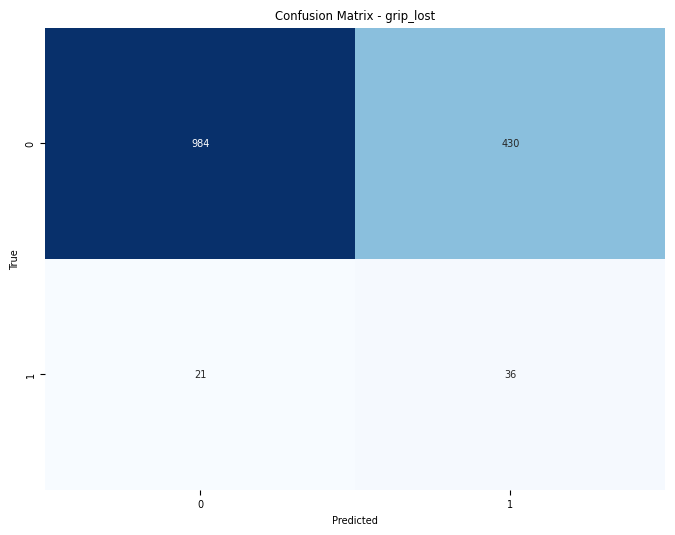

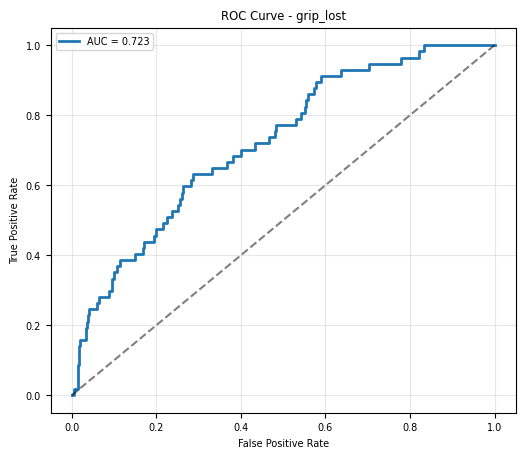

AUC-ROC: 0.7229

Hold-Out Validation for Robot_ProtectiveStop:
Training time: 0.02525186538696289 seconds
Prediction time: 0.007517576217651367 seconds
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1403
           1       0.10      0.69      0.18        68

    accuracy                           0.70      1471
   macro avg       0.54      0.70      0.50      1471
weighted avg       0.94      0.70      0.79      1471



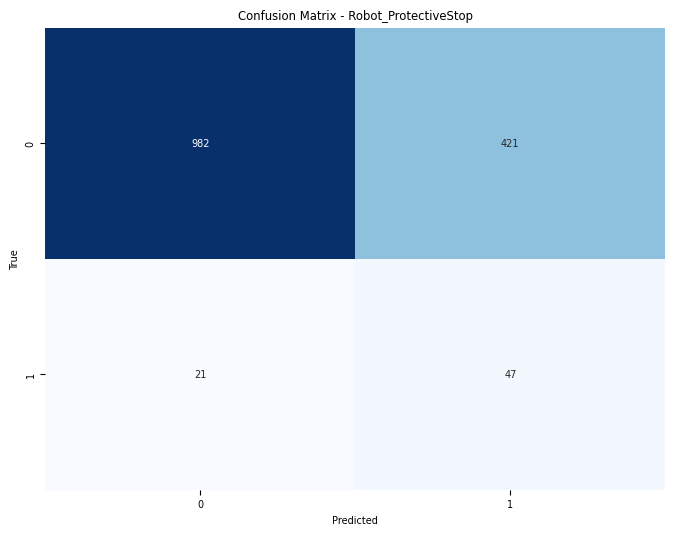

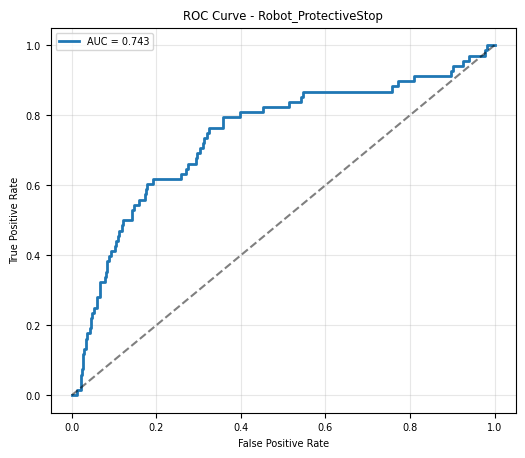

AUC-ROC: 0.7434

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.03108048 0.03007245 0.03121614 0.02609468 0.03006673]

score_time: [0.01944923 0.01712918 0.01352549 0.01313567 0.02961922]

test_precision: [0.07725322 0.08230453 0.06593407 0.0661157  0.06436782]
Average test_precision: 0.07

test_recall: [0.63157895 0.71428571 0.68181818 0.76190476 0.63636364]
Average test_recall: 0.69

test_f1: [0.1376673  0.14760148 0.12024048 0.121673   0.11691023]
Average test_f1: 0.13

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.02951312 0.0278616  0.02985239 0.02733874 0.02758765]

score_time: [0.01189375 0.01224804 0.01410556 0.01252222 0.01455212]

test_precision: [0.10042735 0.07302231 0.10141988 0.07256236 0.08210526]
Average test_precision: 0.09

test_recall: [0.69117647 0.67924528 0.83333333 0.68085106 0.78      ]
Average test_recall: 0.73

test_f1: [0.17537313 0.13186813 0.18083183 0.131147

In [30]:
logistic_pipeline_custom = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionClassifier(
        learning_rate=1.0,
        class_weight='balanced',
        max_iter=100,
        regularization_term='l2',
        lambda_reg=0.1
    ))
])

hold_out_validation(logistic_pipeline_custom, X, y, plot_roc=True)
k_fold_cross_validation(logistic_pipeline_custom, X, y, k=5)

Hold-Out Validation for grip_lost:
Training time: 0.0404810905456543 seconds
Prediction time: 0.0010142326354980469 seconds
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1414
           1       0.08      0.61      0.14        57

    accuracy                           0.70      1471
   macro avg       0.53      0.66      0.48      1471
weighted avg       0.94      0.70      0.79      1471



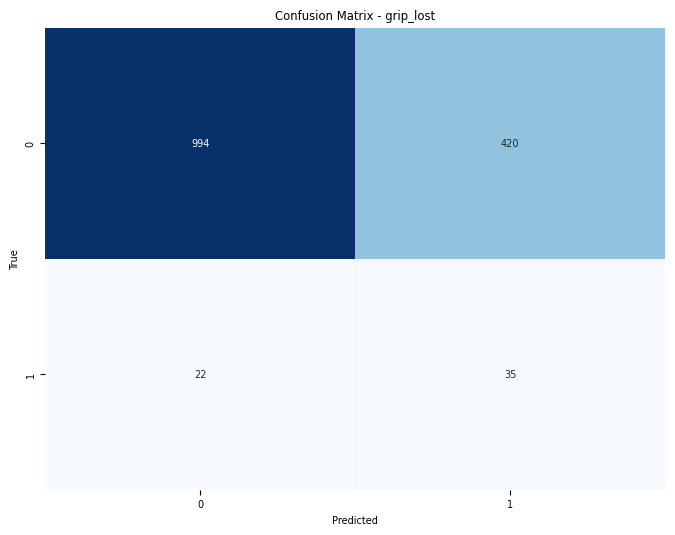

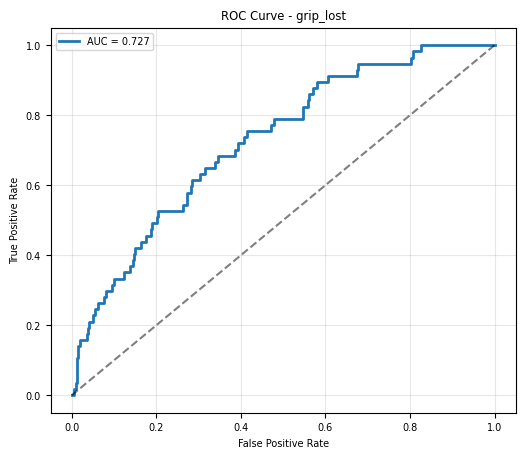

AUC-ROC: 0.7271

Hold-Out Validation for Robot_ProtectiveStop:
Training time: 0.04119229316711426 seconds
Prediction time: 0.002002239227294922 seconds
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1403
           1       0.11      0.72      0.18        68

    accuracy                           0.71      1471
   macro avg       0.54      0.71      0.50      1471
weighted avg       0.94      0.71      0.79      1471



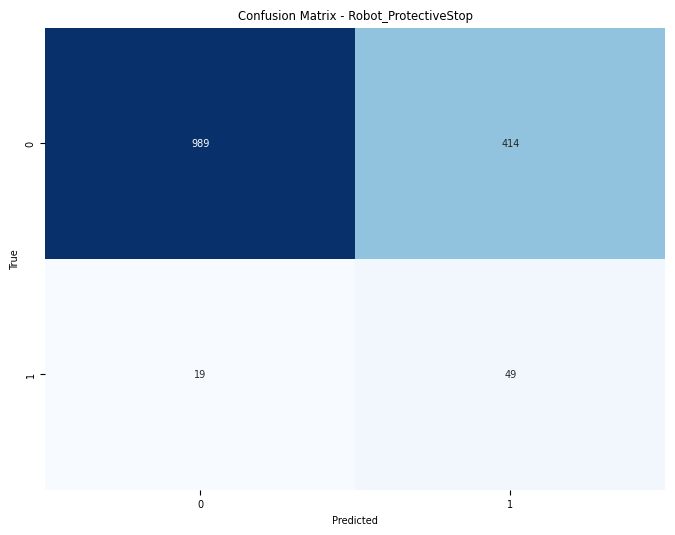

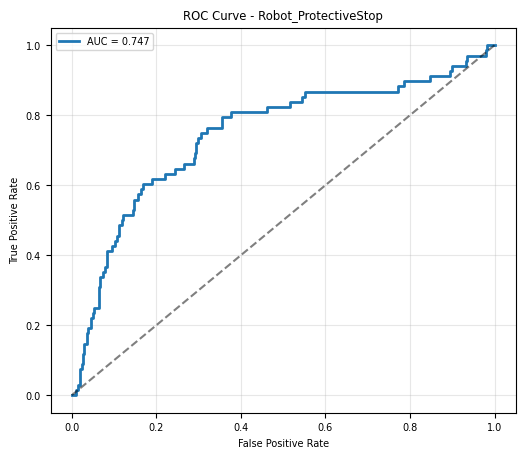

AUC-ROC: 0.7470

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.04428124 0.03917694 0.03509998 0.04316187 0.0551765 ]

score_time: [0.00951624 0.00926208 0.0113368  0.01951766 0.01153159]

test_precision: [0.07692308 0.08613445 0.06651885 0.06694561 0.06839623]
Average test_precision: 0.07

test_recall: [0.61403509 0.73214286 0.68181818 0.76190476 0.65909091]
Average test_recall: 0.69

test_f1: [0.13671875 0.15413534 0.12121212 0.12307692 0.12393162]
Average test_f1: 0.13

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.0348649  0.03906345 0.03994823 0.04106092 0.0526576 ]

score_time: [0.01000214 0.00906324 0.00751853 0.0080626  0.01709437]

test_precision: [0.10583153 0.07438017 0.09958506 0.07517084 0.08385744]
Average test_precision: 0.09

test_recall: [0.72058824 0.67924528 0.8        0.70212766 0.8       ]
Average test_recall: 0.74

test_f1: [0.18455744 0.13407821 0.17712177 0.135802

In [31]:
logistic_pipeline_sklearn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        max_iter=100,
        solver='liblinear',
        random_state=42,
        class_weight='balanced',
        penalty='l2',
        C=0.1
    ))
])

hold_out_validation(logistic_pipeline_sklearn, X, y, plot_roc=True)
k_fold_cross_validation(logistic_pipeline_sklearn, X, y, k=5)

### 3.3 Gaussian Naive Bayes

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from supervised_learning.gaussian_naive_bayes import GaussianNaiveBayesClassifier

Hold-Out Validation for grip_lost:
Training time: 0.006525516510009766 seconds
Prediction time: 0.0010008811950683594 seconds
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1414
           1       0.08      0.39      0.14        57

    accuracy                           0.81      1471
   macro avg       0.53      0.61      0.51      1471
weighted avg       0.94      0.81      0.86      1471



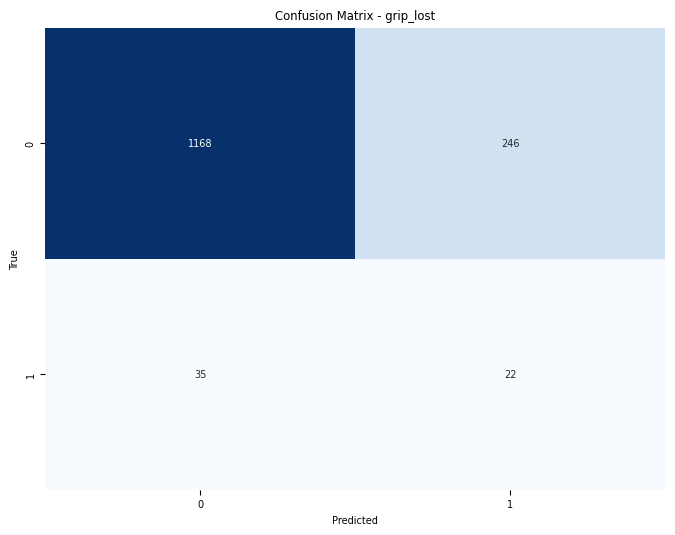

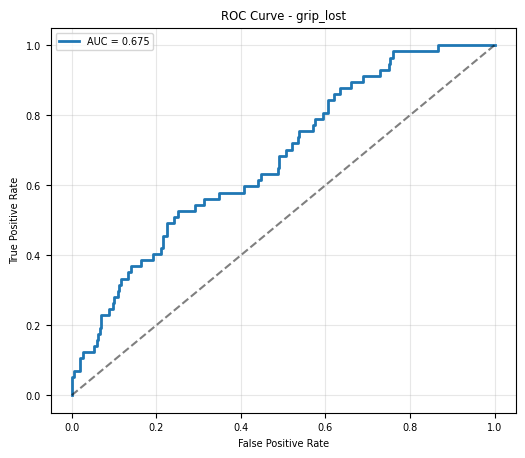

AUC-ROC: 0.6750

Hold-Out Validation for Robot_ProtectiveStop:
Training time: 0.006546735763549805 seconds
Prediction time: 0.000990152359008789 seconds
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1403
           1       0.10      0.90      0.17        68

    accuracy                           0.61      1471
   macro avg       0.54      0.75      0.46      1471
weighted avg       0.95      0.61      0.72      1471



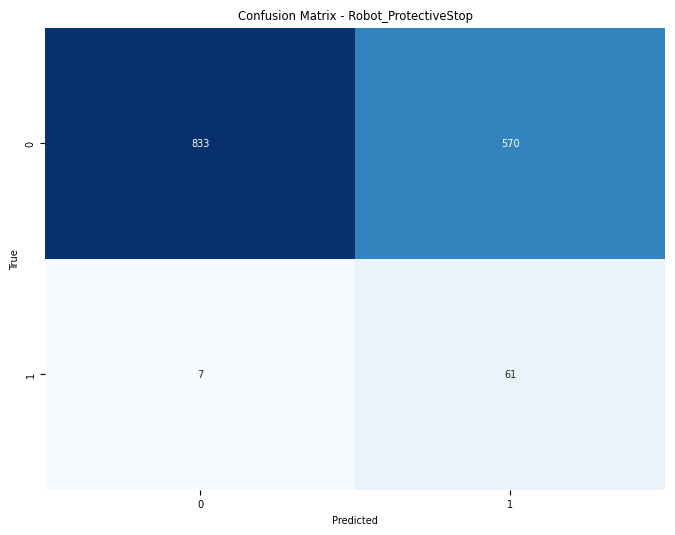

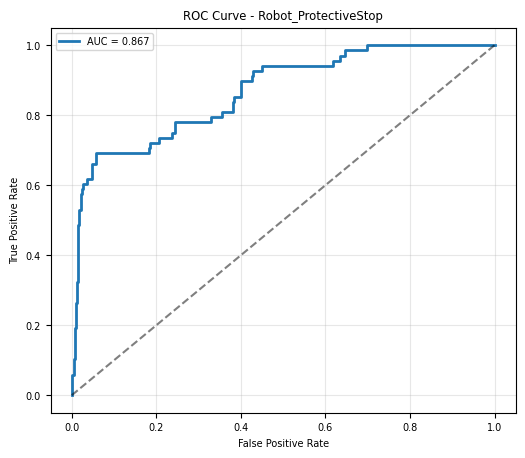

AUC-ROC: 0.8673

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.00701118 0.00752044 0.00603151 0.0065279  0.00600076]

score_time: [0.00703263 0.00820112 0.00700688 0.00651288 0.00850987]

test_precision: [0.08208955 0.10408922 0.06521739 0.08064516 0.07727273]
Average test_precision: 0.08

test_recall: [0.38596491 0.5        0.34090909 0.47619048 0.38636364]
Average test_recall: 0.42

test_f1: [0.13538462 0.17230769 0.10948905 0.13793103 0.12878788]
Average test_f1: 0.14

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.00619054 0.00600934 0.00551367 0.00515842 0.00650764]

score_time: [0.01068902 0.00753403 0.00799966 0.00750923 0.00700831]

test_precision: [0.09667195 0.06942393 0.08580343 0.06435644 0.06766917]
Average test_precision: 0.08

test_recall: [0.89705882 0.88679245 0.91666667 0.82978723 0.9       ]
Average test_recall: 0.89

test_f1: [0.17453505 0.12876712 0.15691869 0.119448

In [33]:
gaussian_nb_pipeline_custom = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNaiveBayesClassifier())
])

hold_out_validation(gaussian_nb_pipeline_custom, X, y, plot_roc=True)
k_fold_cross_validation(gaussian_nb_pipeline_custom, X, y, k=5)

Hold-Out Validation for grip_lost:
Training time: 0.00852513313293457 seconds
Prediction time: 0.0019996166229248047 seconds
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1414
           1       0.08      0.39      0.14        57

    accuracy                           0.81      1471
   macro avg       0.53      0.61      0.51      1471
weighted avg       0.94      0.81      0.86      1471



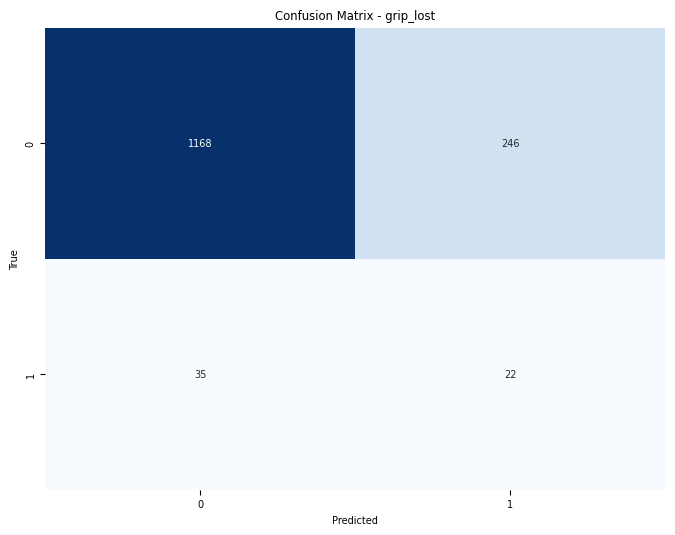

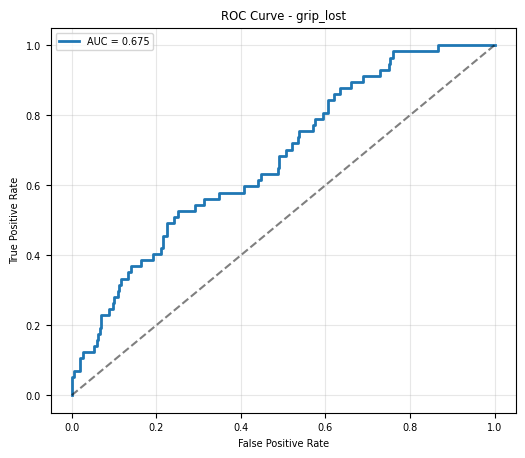

AUC-ROC: 0.6750

Hold-Out Validation for Robot_ProtectiveStop:
Training time: 0.007702827453613281 seconds
Prediction time: 0.002010822296142578 seconds
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1403
           1       0.10      0.90      0.17        68

    accuracy                           0.61      1471
   macro avg       0.54      0.75      0.46      1471
weighted avg       0.95      0.61      0.72      1471



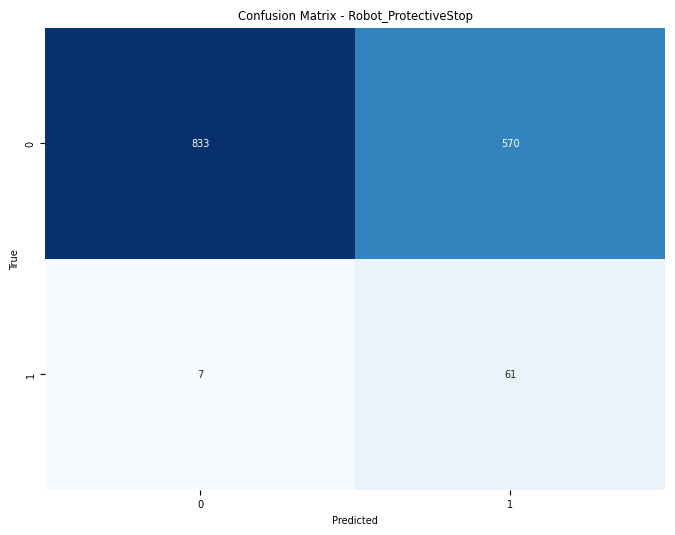

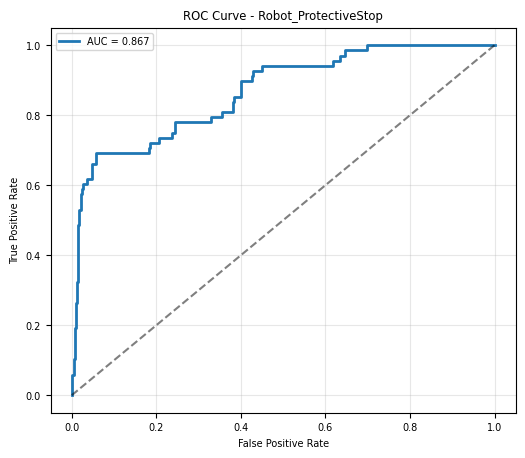

AUC-ROC: 0.8673

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.01029181 0.00967407 0.00614262 0.00637221 0.0075345 ]

score_time: [0.00952792 0.00851369 0.00751424 0.00875115 0.00570464]

test_precision: [0.08208955 0.10408922 0.06521739 0.08064516 0.07727273]
Average test_precision: 0.08

test_recall: [0.38596491 0.5        0.34090909 0.47619048 0.38636364]
Average test_recall: 0.42

test_f1: [0.13538462 0.17230769 0.10948905 0.13793103 0.12878788]
Average test_f1: 0.14

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.00550628 0.00617123 0.00658536 0.00600934 0.0060699 ]

score_time: [0.00750637 0.00796556 0.00834918 0.00551057 0.00754762]

test_precision: [0.09667195 0.06942393 0.08580343 0.06435644 0.06766917]
Average test_precision: 0.08

test_recall: [0.89705882 0.88679245 0.91666667 0.82978723 0.9       ]
Average test_recall: 0.89

test_f1: [0.17453505 0.12876712 0.15691869 0.119448

In [34]:
gaussian_nb_pipeline_sklearn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

hold_out_validation(gaussian_nb_pipeline_sklearn, X, y, plot_roc=True)
k_fold_cross_validation(gaussian_nb_pipeline_sklearn, X, y, k=5)

### 3.4 Classification Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier as DTClassifierSklearn
from supervised_learning.cart import DecisionTreeClassifier as DTClassifierCustom

In [36]:
# decision_tree_pipeline_custom = Pipeline([
#     # ('scaler', StandardScaler()),
#     ('classifier', DTClassifierCustom(criterion='gini'))
# ])

# hold_out_validation(decision_tree_pipeline_custom, X, y, plot_roc=True)
# # k_fold_cross_validation(decision_tree_pipeline_custom, X, y, k=5)

In [37]:
# decision_tree_pipeline_sklearn = Pipeline([
#     # ('scaler', StandardScaler()),
#     ('classifier', DTClassifierSklearn())
# ])

# hold_out_validation(decision_tree_pipeline_sklearn, X, y, plot_roc=True)
# k_fold_cross_validation(decision_tree_pipeline_sklearn, X, y, k=5)

### 3.5 Support Vector Machines

In [38]:
from sklearn.svm import SVC
from supervised_learning.svm import SVMClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [39]:
# # Test different SVM kernels
# # kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# kernels = ['linear']

# for kernel in kernels:
#     print(f"\n{'='*80}")
#     print(f"Testing SVM with {kernel.upper()} kernel")
#     print(f"{'='*80}")
    
#     svm_pipeline = Pipeline([
#         # ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
#         ('scaler', StandardScaler()),
#         ('classifier', SVMClassifier(
#                             # kernel=kernel,
#                         #    random_state=42,
#                         #    class_weight='balanced'
#                            ))
#     ])
    
#     hold_out_validation(svm_pipeline, X, y, plot_roc=True)
#     # k_fold_cross_validation(svm_pipeline, X, y, k=5, roc_auc=True)


Testing SVM with LINEAR kernel
Hold-Out Validation for grip_lost:
Training time: 1.4335534572601318 seconds
Prediction time: 0.032976388931274414 seconds
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1414
           1       0.00      0.00      0.00        57

    accuracy                           0.96      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.92      0.96      0.94      1471



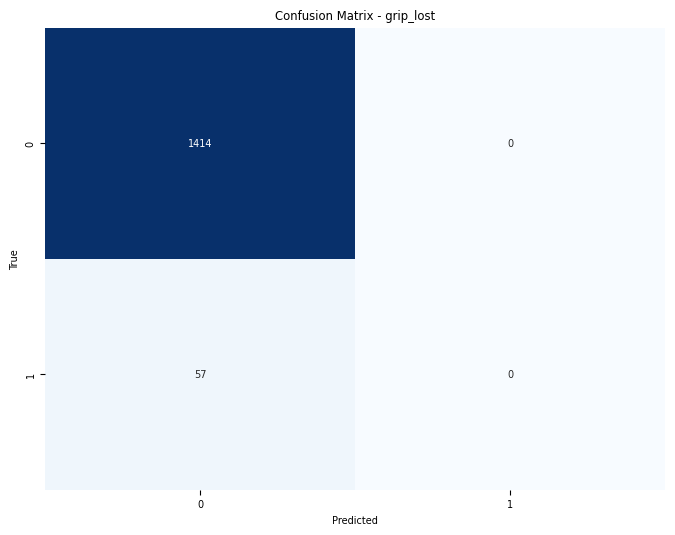

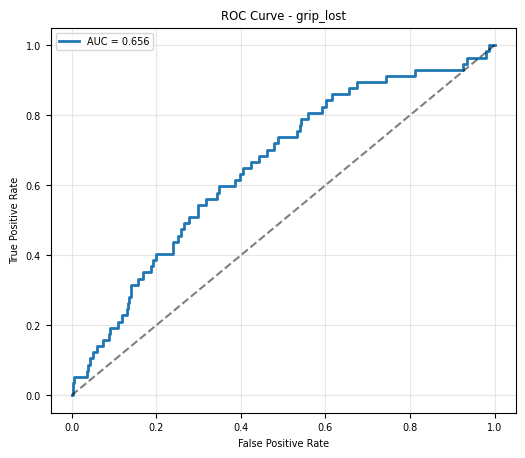

AUC-ROC: 0.6559

Hold-Out Validation for Robot_ProtectiveStop:
Training time: 1.074676513671875 seconds
Prediction time: 0.0347437858581543 seconds
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1403
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.91      0.95      0.93      1471



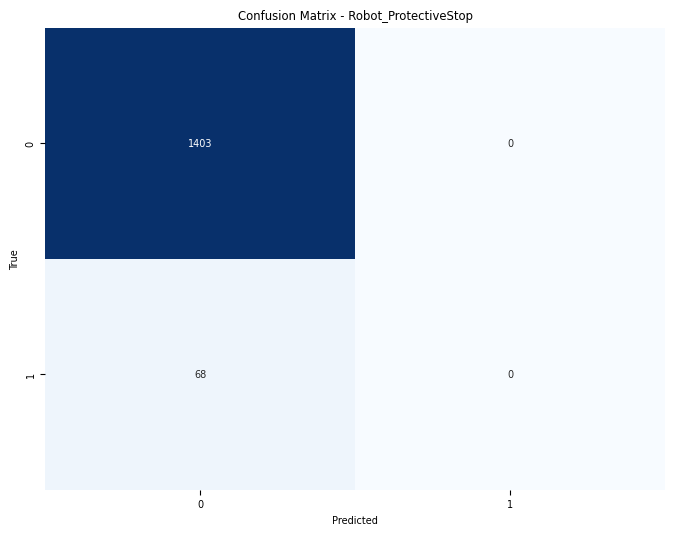

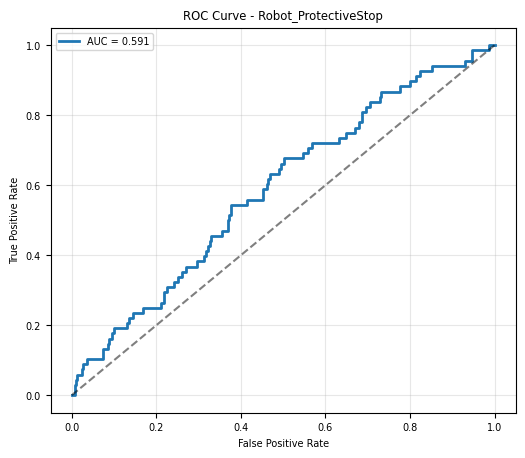

AUC-ROC: 0.5905



In [40]:
# Test different SVM kernels
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels = ['linear']

for kernel in kernels:
    print(f"\n{'='*80}")
    print(f"Testing SVM with {kernel.upper()} kernel")
    print(f"{'='*80}")
    
    svm_pipeline = Pipeline([
        # ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('classifier', SVC(
                        kernel=kernel,
                        #    probability=True,
                        #    random_state=42,
                        #    class_weight='balanced'
                           ))
    ])
    
    hold_out_validation(svm_pipeline, X, y, plot_roc=True)
    # k_fold_cross_validation(svm_pipeline, X, y, k=5, roc_auc=True)

### 3.6 Artificial Neural Networks

In [41]:
from supervised_learning.ann import SimpleNet
from sklearn.pipeline import Pipeline

Hold-Out Validation for grip_lost:
Epoch 0, Loss: 0.24949684854838697
Epoch 100, Loss: 0.19954293627850134
Epoch 200, Loss: 0.1621836727861204
Epoch 300, Loss: 0.1345436378615763
Epoch 400, Loss: 0.113999378005848
Epoch 500, Loss: 0.09853720056137878
Epoch 600, Loss: 0.08671887116297425
Epoch 700, Loss: 0.07754056388818248
Epoch 800, Loss: 0.07030451253147513
Epoch 900, Loss: 0.0645217991364208
Training time: 27.142698764801025 seconds
Prediction time: 0.0046308040618896484 seconds
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1414
           1       0.00      0.00      0.00        57

    accuracy                           0.96      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.92      0.96      0.94      1471



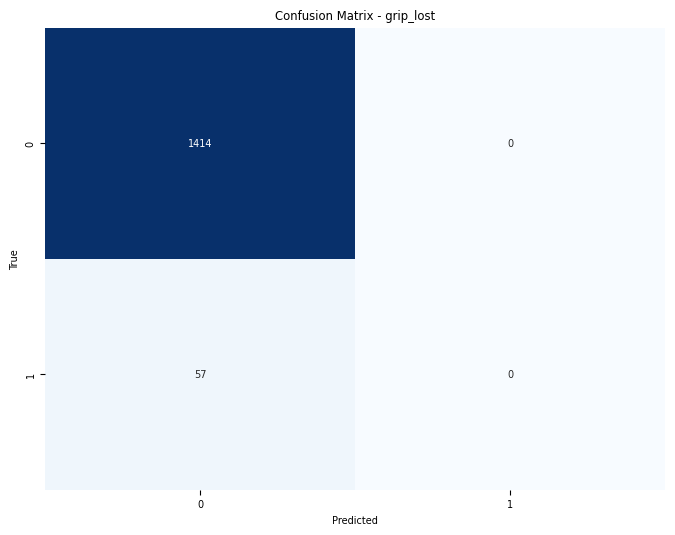

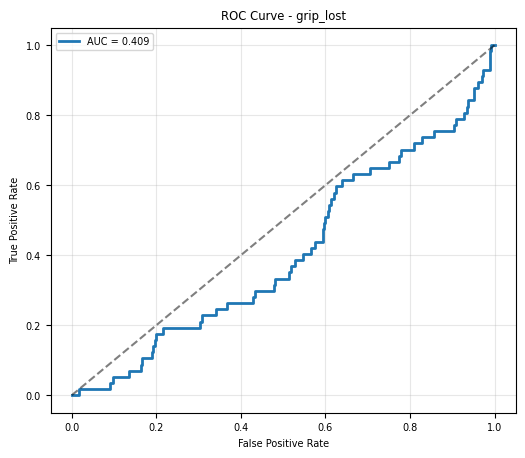

AUC-ROC: 0.4088

Hold-Out Validation for Robot_ProtectiveStop:
Epoch 0, Loss: 0.06201554146835355
Epoch 100, Loss: 0.05833511168006472
Epoch 200, Loss: 0.05529122285963195
Epoch 300, Loss: 0.05275166285788218
Epoch 400, Loss: 0.05061588162655688
Epoch 500, Loss: 0.048806580432724234
Epoch 600, Loss: 0.04726338192020433
Epoch 700, Loss: 0.045938697686560954
Epoch 800, Loss: 0.04479482544998944
Epoch 900, Loss: 0.043801571185762875
Training time: 27.69964098930359 seconds
Prediction time: 0.007016658782958984 seconds
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1403
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.91      0.95      0.93      1471



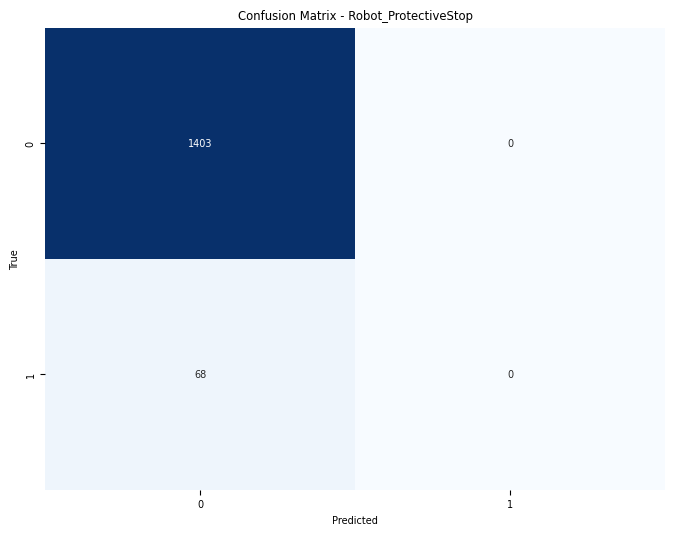

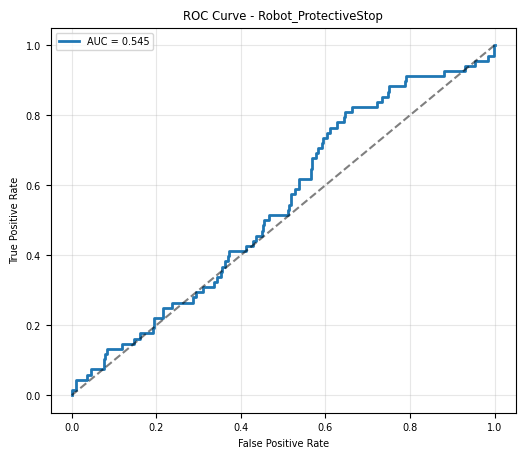

AUC-ROC: 0.5452



In [42]:

ann_pipeline = Pipeline([
    # ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('classifier', SimpleNet(
                        input_size=X.shape[1],
                        hidden_size=100,
                        output_size=1
                    ))
])

hold_out_validation(ann_pipeline, X, y, plot_roc=True)
# k_fold_cross_validation(ann_pipeline, X, y, k=5, roc_auc=True)

Hold-Out Validation for grip_lost:
Epoch 0, Loss: 0.2805977761745453
Epoch 100, Loss: 0.10235217958688736
Epoch 200, Loss: 0.06682416796684265
Epoch 300, Loss: 0.05372712016105652
Epoch 400, Loss: 0.04719197377562523
Epoch 500, Loss: 0.04335685819387436
Epoch 600, Loss: 0.04086795449256897
Epoch 700, Loss: 0.039137668907642365
Epoch 800, Loss: 0.037873320281505585
Epoch 900, Loss: 0.03691383823752403
Training time: 10.51892352104187 seconds
Prediction time: 0.008566856384277344 seconds
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1414
           1       0.00      0.00      0.00        57

    accuracy                           0.96      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.92      0.96      0.94      1471



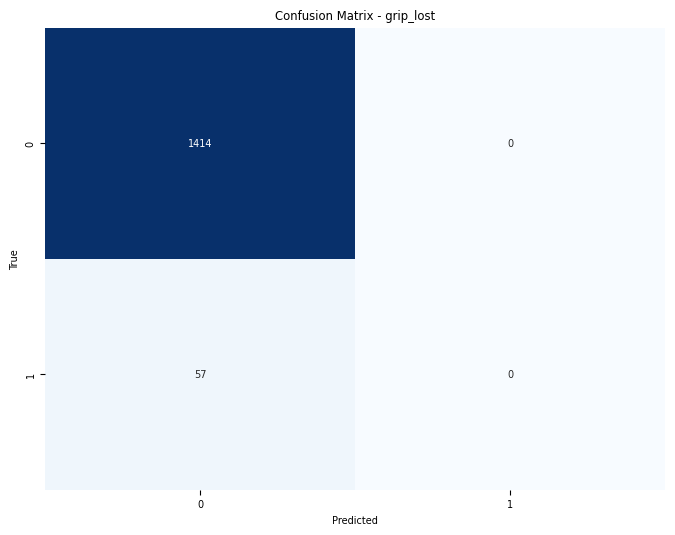

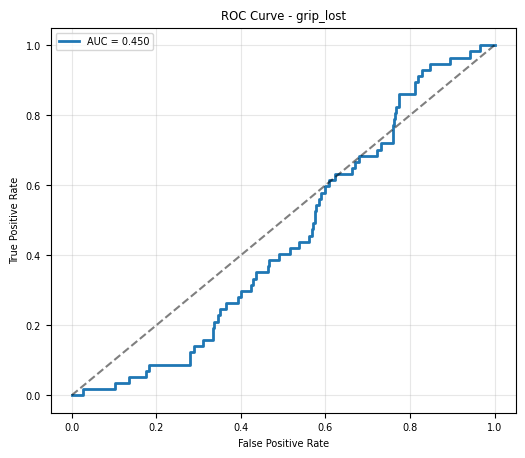

AUC-ROC: 0.4500

Hold-Out Validation for Robot_ProtectiveStop:
Epoch 0, Loss: 0.03913430869579315
Epoch 100, Loss: 0.03850549831986427
Epoch 200, Loss: 0.03799453377723694
Epoch 300, Loss: 0.03757161647081375
Epoch 400, Loss: 0.03721623495221138
Epoch 500, Loss: 0.036913610994815826
Epoch 600, Loss: 0.03665287047624588
Epoch 700, Loss: 0.036425914615392685
Epoch 800, Loss: 0.036226555705070496
Epoch 900, Loss: 0.0360499769449234
Training time: 8.798871040344238 seconds
Prediction time: 0.0020017623901367188 seconds
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1403
           1       0.00      0.00      0.00        68

    accuracy                           0.95      1471
   macro avg       0.48      0.50      0.49      1471
weighted avg       0.91      0.95      0.93      1471



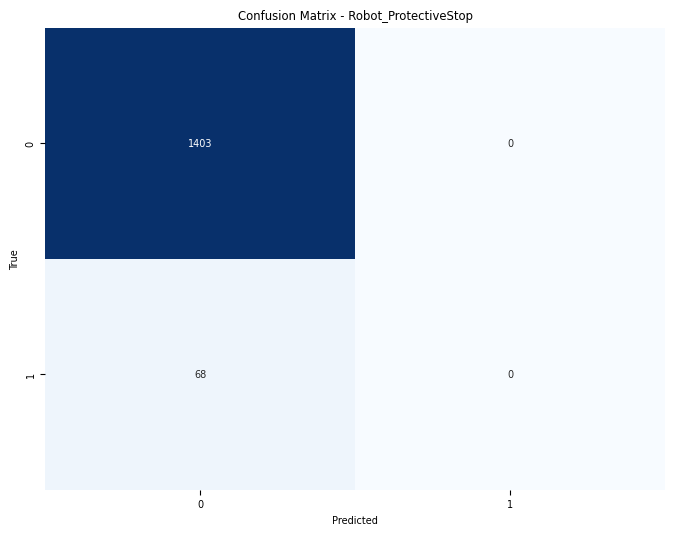

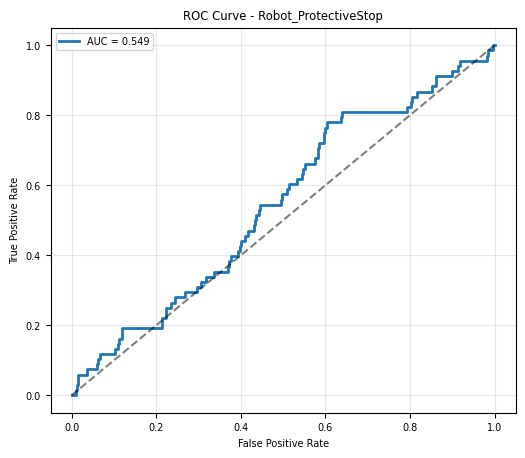

AUC-ROC: 0.5485



In [43]:
import torch
import torch.nn as nn
import numpy as np

class SimpleNetPyTorch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNetPyTorch, self).__init__()
        # Define the layers using PyTorch's built-in modules
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """Defines the forward pass of the network."""
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)

    def fit(self, x, y, epochs=1000, lr=0.01):
        """
        Trains the network using the provided data.
        This method encapsulates the standard PyTorch training loop.
        """
        # Convert numpy arrays to PyTorch tensors
        x_tensor = torch.FloatTensor(x)
        # Ensure y is a 2D column vector
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        y_tensor = torch.FloatTensor(y)

        # Define the loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(), lr=lr)

        # Set the model to training mode
        self.train()

        for epoch in range(epochs):
            # 1. Zero the gradients
            optimizer.zero_grad()
            
            # 2. Forward pass: compute predicted y by passing x to the model
            output = self.forward(x_tensor)
            
            # 3. Compute loss
            loss = criterion(output, y_tensor)
            
            # 4. Backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # 5. Update weights: call step() to update the parameters
            optimizer.step()

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    def predict(self, X):
        """
        Predicts class labels (0 or 1) for the input data.
        Accepts a NumPy array and returns a NumPy array for scikit-learn compatibility.
        """
        # Set the model to evaluation mode
        self.eval()
        with torch.no_grad(): # Disable gradient calculation for inference
            X_tensor = torch.FloatTensor(X)
            probabilities = self.forward(X_tensor).detach().numpy()
            return (probabilities >= 0.5).astype(int)

    def predict_proba(self, X):
        """
        Predicts class probabilities for the input data.
        Accepts a NumPy array and returns a NumPy array for scikit-learn compatibility.
        """
        # Set the model to evaluation mode
        self.eval()
        with torch.no_grad(): # Disable gradient calculation for inference
            X_tensor = torch.FloatTensor(X)
            prob_class_1 = self.forward(X_tensor).detach().numpy()
            prob_class_0 = 1 - prob_class_1
            return np.hstack((prob_class_0, prob_class_1))

# Example of how to use it in your notebook:
ann_pipeline_pytorch = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SimpleNetPyTorch(
                        input_size=X.shape[1],
                        hidden_size=100,
                        output_size=1
                    ))
])

hold_out_validation(ann_pipeline_pytorch, X, y, plot_roc=True)